In [2]:
!pip install numpy yfinance matplotlib

In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm

In [53]:
tickers = ['AAPL', 'MSFT', 'MS']
weights = np.array([0.30, 0.40, 0.30]).reshape(1,-1)

In [6]:
start_date = dt.datetime(2024,1,1)
end_date = dt.datetime(2024,2,1)

data = yf.download(tickers, start_date, end_date)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [7]:
data.head()

Ticker,AAPL,MS,MSFT
Date,,,
2024-01-02 00:00:00+00:00,184.938217,91.316238,368.854095
2024-01-03 00:00:00+00:00,183.553467,89.380989,368.585571
2024-01-04 00:00:00+00:00,181.222336,89.614388,365.940002
2024-01-05 00:00:00+00:00,180.495071,90.674385,365.751038
2024-01-08 00:00:00+00:00,184.858521,90.936966,372.653351


In [62]:
returns = data.pct_change()
cov_matrix = returns.cov().to_numpy()

In [74]:
return_mean = returns.mean().to_numpy()

In [75]:
portfolio_mean = np.dot(weights, return_mean).item()
print(portfolio_mean)

-0.00025180389942181165


In [69]:
portfolio_std = (weights @ cov_matrix @ weights.T).item()
print(portfolio_std)

8.56761028002404e-05


In [76]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, portfolio_mean, portfolio_std)
VaR

-0.0003927285478558543

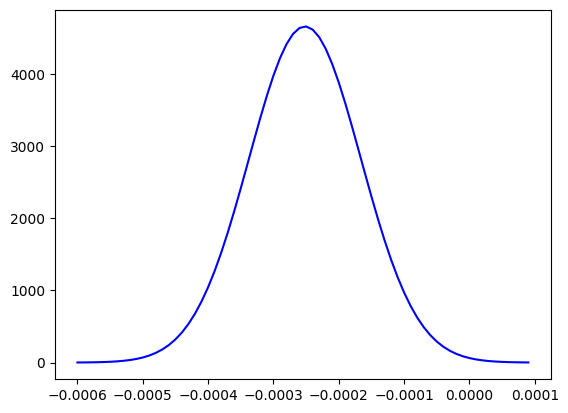

In [87]:
x = np.arange(-0.0006,0.0001, 0.00001)
norm_dist = norm.pdf(x, portfolio_mean, portfolio_std)
plt.plot(x,norm_dist,color='b')